In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import preprocessing

In [2]:
titanic_train=pd.read_csv(r"C:\Users\sathv\LU\datasets\train.csv")

In [3]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [5]:

titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
885,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
886,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,45.0,1,2,W./C. 6607,23.4500,NaN,S
887,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
#Preprocessing
lab_enc=preprocessing.LabelEncoder()
titanic_train["Sex"]=lab_enc.fit_transform(titanic_train["Sex"])

In [7]:
predictors=pd.DataFrame([titanic_train['Age'],titanic_train["Sex"],titanic_train['Fare']]).T

In [8]:
predictors.head()

,Age,Sex,Fare
0,22.0,1.0,7.2500
1,38.0,0.0,71.2833
2,26.0,0.0,7.9250
3,35.0,0.0,53.1000
4,35.0,1.0,8.0500


In [9]:
tree_model=tree.DecisionTreeClassifier(max_depth=6)
tree_model.fit(X=predictors,y=titanic_train['Survived'])
tree_model

DecisionTreeClassifier(max_depth=6)

In [10]:

with open("Dtree.dot",'w') as f:
    f=tree.export_graphviz(tree_model,feature_names=["Age","Sex","Fare"],out_file=f)


In [11]:
#Prediction
titanic_test=pd.read_csv(r"C:\Users\sathv\LU\datasets\test.csv")

In [12]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [13]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
#Preprocessing
titanic_test["Sex"]=lab_enc.fit_transform(titanic_test["Sex"])

In [15]:
test_features=pd.DataFrame([titanic_test["Age"],titanic_test["Sex"],titanic_test['Fare']]).T

In [16]:
test_features

,Age,Sex,Fare
0,34.5,1.0,7.8292
1,47.0,0.0,7.0000
2,62.0,1.0,9.6875
3,27.0,1.0,8.6625
4,22.0,0.0,12.2875
...,...,...,...
412,45.0,1.0,8.0500
413,39.0,0.0,108.9000
414,38.5,1.0,7.2500
415,45.0,1.0,8.0500


In [17]:
test_preds=tree_model.predict(X=test_features)
Output=pd.DataFrame({"Passenger Id":titanic_test['PassengerId'],"Survived":test_preds})
Output.to_csv("Survival.csv",index=False)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=1000,max_features=2,oob_score=True)
features=["Age","Sex","Fare"]
rf_model.fit(X=titanic_train[features],y=titanic_train["Survived"])
print(rf_model.oob_score_)

0.7851518560179978


In [19]:
from sklearn.tree import export_text
r=export_text(tree_model,feature_names=features)
print(r)

|--- Sex <= 0.50
|   |--- Fare <= 48.20
|   |   |--- Fare <= 27.82
|   |   |   |--- Fare <= 25.70
|   |   |   |   |--- Fare <= 24.07
|   |   |   |   |   |--- Fare <= 10.48
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Fare >  10.48
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  24.07
|   |   |   |   |   |--- Fare <= 24.81
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  24.81
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Fare >  25.70
|   |   |   |   |--- Fare <= 26.12
|   |   |   |   |   |--- Age <= 25.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  25.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  26.12
|   |   |   |   |   |--- class: 1
|   |   |--- Fare >  27.82
|   |   |   |--- Fare <= 28.86
|   |   |   |   |--- class: 0
|   |   |   |--- Fare >  28.86
|   |   |   |   |--- Fare <= 44.24
|   |   |   |   |   |--- Fare <= 36.69
|   |   |   |   |   |   |--- class: 1
|   | 

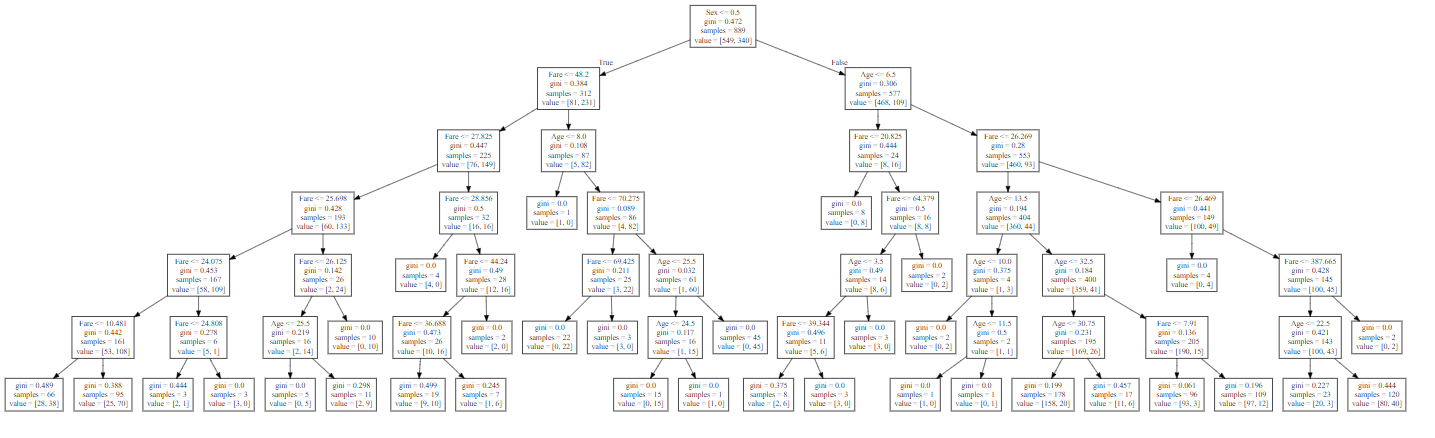:

Inferences:
1)If gender is female and fare less than 48.2 and fare greater than 26.15 survived 

2)If gender is female and fare less than 26.15 and age less than 25.5 survived

3)If gender is female and fare greater than 48.2 and less than 69.42 survived

4)If gender is female and fare greater than 70.27 and age less than 25.5 survived

5)If gender is female and fare greater than 70.27 and age greater than 25.5 survived

5)If gender is male and age is less than 6.5 and fare less than 20.82 survived

6)If gender is male and age is less than 6.5 and fare greater than 64.37 survived 

7)If gender is male and age is greater than 6.5 and fare less than 26.46 survived

8)If gender is male and age is greater than 6.5 and fare greater than 26.46 survived and less than 387 survived